# PRINCIPAL COMPONENT ANALYSIS

### IMPORT

In [11]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from tensorflow.keras.datasets.mnist import load_data
import matplotlib.pyplot as plt
import glob
import cv2
import os

### MODEL

In [12]:
class Pca:

    def __init__(self, x):

        self.x = self.normalize(x)
        self.vectors, self.values = self.getEigen()
        self.variances = self.getVariances()
        
        print("eigen vectors")
        print(self.vectors)
        print("eigen values")
        print(self.values)
        print("explained variances")
        print(self.variances)
    
    def getVariances(self):
        
        variances = []
        for i in range(self.values.shape[0]):
            variances.append(self.values[i] / np.sum(self.values))
        return np.array(variances)
        
    
    def getEigen(self):

        cov = np.cov(self.x.T)
        return np.linalg.eig(cov)

    @staticmethod
    def normalize(x):

        scaler = StandardScaler()
        scaler.fit(x)
        return scaler.transform(x)

### TEST CASE

#### DATA

In [13]:
trial = np.array([[1, 1], [1, 0.5], [3, 3], [3, 3.5], [5, 5], [5, 5.5]])
print("x shape: " + str(trial.shape))

x shape: (6, 2)


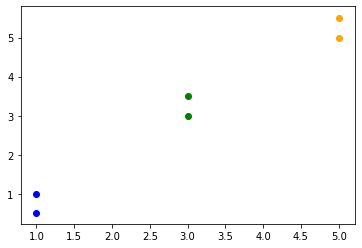

In [14]:
plt.scatter(trial[:2, 0], trial[:2, 1], color="blue")
plt.scatter(trial[2:4, 0], trial[2:4, 1], color="green")
plt.scatter(trial[4:, 0], trial[4:, 1], color="orange")
plt.show()

#### TRAIN

In [15]:
pca = Pca(trial)

eigen vectors
[0.01335398 2.38664602]
eigen values
[[-0.70710678 -0.70710678]
 [ 0.70710678 -0.70710678]]
explained variances
[[ 0.5  0.5]
 [-0.5  0.5]]


##### RESULT

In [16]:
oned = trial.dot(pca.vectors.T)

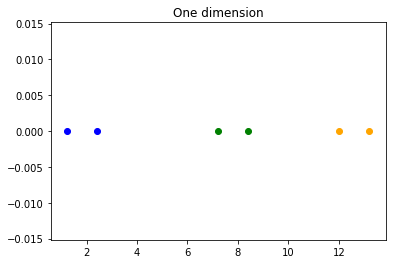

In [17]:
plt.scatter(oned[:2], [0] * 2, color="blue")
plt.scatter(oned[2:4], [0] * 2, color="green")
plt.scatter(oned[4:], [0] * 2, color="orange")
plt.title("One dimension")
plt.show()

In [18]:
vectorOne = trial.dot(pca.vectors[0].T)

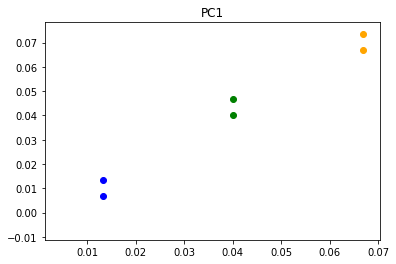

In [19]:
plt.scatter(vectorOne[:2, 0], vectorOne[:2, 1], color="blue")
plt.scatter(vectorOne[2:4, 0], vectorOne[2:4, 1], color="green")
plt.scatter(vectorOne[4:, 0], vectorOne[4:, 1], color="orange")
plt.title("PC1")
plt.show()

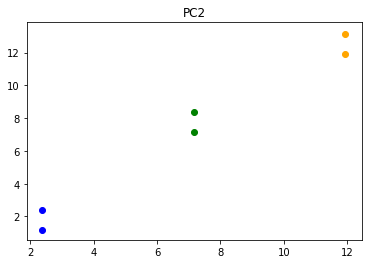

In [20]:
vectorTwo = trial.dot(pca.vectors[1].T)
plt.scatter(vectorTwo[:2, 0], vectorTwo[:2, 1], color="blue")
plt.scatter(vectorTwo[2:4, 0], vectorTwo[2:4, 1], color="green")
plt.scatter(vectorTwo[4:, 0], vectorTwo[4:, 1], color="orange")
plt.title("PC2")
plt.show()

### MINST DIGITS

In [21]:
def get_dataset():
    
    (x_train, y_train), (x_test, y_test) = load_data()
    x_train = x_train.astype('float64') / 255.0
    x_test = x_test.astype('float64') / 255.0
    return x_train, x_test, y_train, y_test

x_train shape: (60000, 28, 28)
x_test shape: (10000, 28, 28)
Training examples


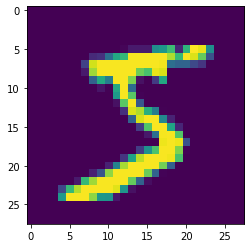

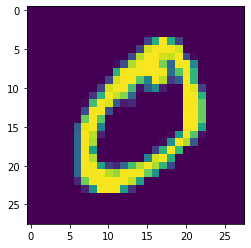

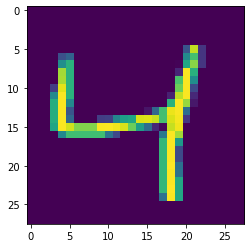

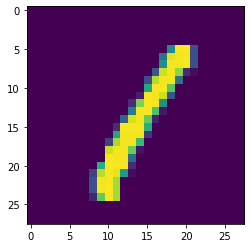

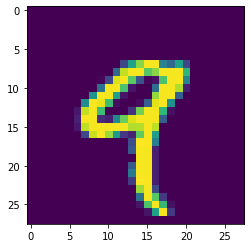

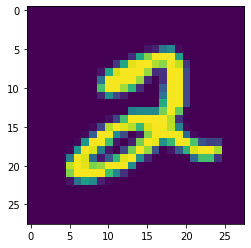

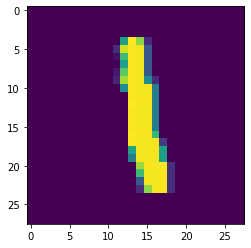

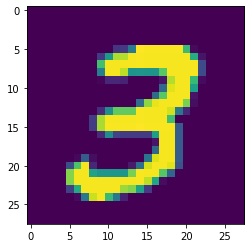

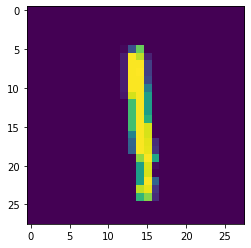

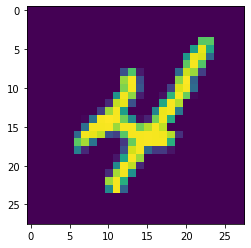

Test examples


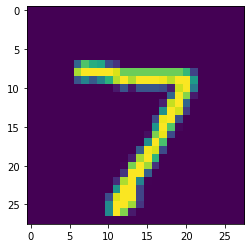

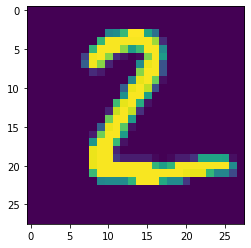

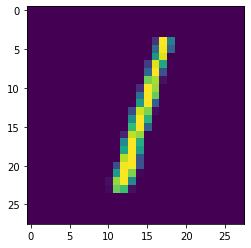

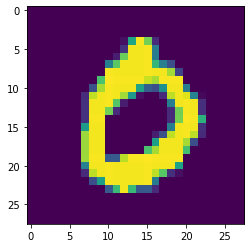

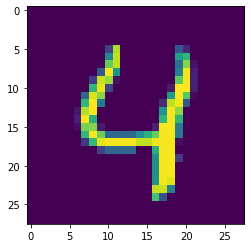

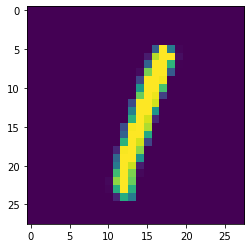

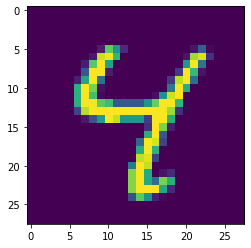

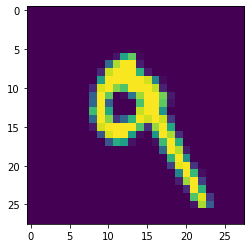

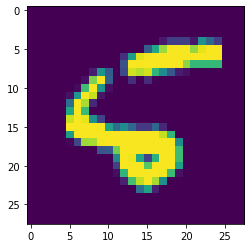

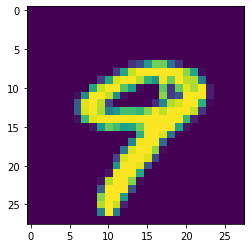

In [22]:
x_train, x_test, y_train, y_test = get_dataset()

print("x_train shape: " + str(x_train.shape))
print("x_test shape: " + str(x_test.shape))

print("Training examples")

for i in range(0, 10):
    
    plt.imshow(x_train[i])
    plt.show()
    
print("Test examples")    
    
for i in range(0, 10):
    
    plt.imshow(x_test[i])
    plt.show()

In [23]:
x_train = x_train.reshape(x_train.shape[0], 784)
x_test = x_test.reshape(x_test.shape[0], 784)
print("x_train shape: " + str(x_train.shape))
print("x_test shape: " + str(x_test.shape))

x_train shape: (60000, 784)
x_test shape: (10000, 784)


#### TRAIN

In [24]:
pca = Pca(x_train)

eigen vectors
[ 4.04876351e+01  2.92416975e+01  2.68118045e+01  2.06866182e+01
  1.80766501e+01  1.57331779e+01  1.37906091e+01  1.25175891e+01
  1.10067953e+01  1.00504971e+01  9.62045779e+00  8.63097356e+00
  7.99159687e+00  7.81488215e+00  7.37553786e+00  7.13058751e+00
  6.71398002e+00  6.60400749e+00  6.40604846e+00  6.23737743e+00
  5.93229172e+00  5.76059855e+00  5.48403364e+00  5.31859721e+00
  5.12873534e+00  4.96062446e+00  4.90533662e+00  4.70843497e+00
  4.52919760e+00  4.39470849e+00  4.27522172e+00  4.21399693e+00
  4.09838079e+00  4.03181137e+00  3.97713624e+00  3.86052409e+00
  3.80864021e+00  3.72563426e+00  3.64393543e+00  3.44169730e+00
  3.41624517e+00  3.36378527e+00  3.25773631e+00  3.23620323e+00
  3.20478100e+00  3.17911021e+00  3.14205728e+00  3.08588859e+00
  3.06076556e+00  3.03759974e+00  2.90171955e+00  2.86408562e+00
  2.84980787e+00  2.82374220e+00  2.76632955e+00  2.71778127e+00
  2.69168208e+00  2.65850712e+00  2.61669482e+00  2.57622805e+00
  2.5266222

##### 3 dimensions

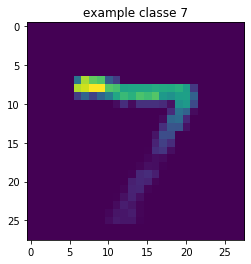

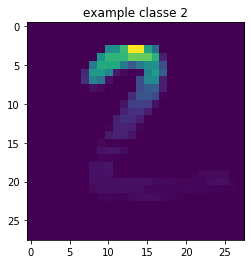

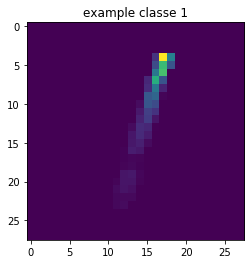

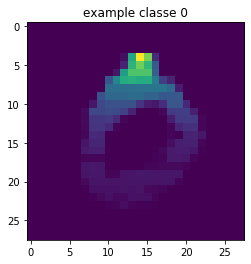

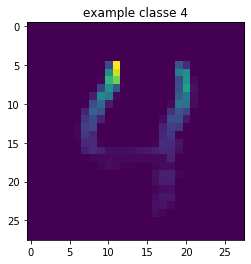

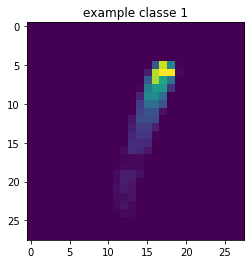

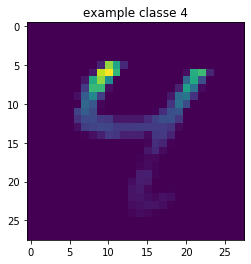

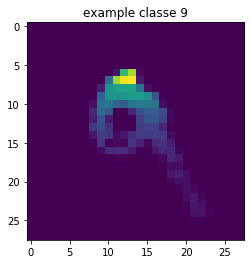

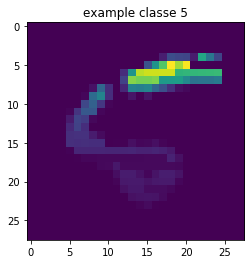

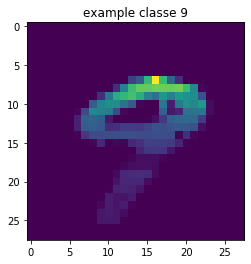

In [28]:
examples = x_test[:10] * pca.vectors.T

for i in range(0, 10):
    
    plt.title("example classe " + str(y_test[i]))
    plt.imshow(examples[i].reshape((28, 28)).astype("float64"))
    plt.show()

### FRUITS 360

#### DATA

In [33]:
def get_dataset(gray=False, size=None):
    
    train_path = "../data/fruits-360/Training/"
    test_path = "../data/fruits-360/Test/"
    x_train, x_test = [], []
    
    for filename in os.listdir(train_path):
        
        for fruit_file in os.listdir(train_path + filename):
            
            image = cv2.imread(train_path + filename + '/' + fruit_file)
            
            if gray:
                image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
            
            if size is not None:
                image = cv2.resize(image, size)
            
            x_train.append(image)
            
    for filename in os.listdir(test_path):
        
        for fruit_file in os.listdir(test_path + filename):
            
            image = cv2.imread(test_path + filename + '/' + fruit_file)
            
            if gray:
                image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
                
            if size is not None:
                image = cv2.resize(image, size)
            
            x_test.append(image)
    
    
    x_train = np.array(x_train)
    x_test = np.array(x_test)
    
    return x_train, x_test

x_train shape: (67692, 28, 28, 3)
x_test shape: (22688, 28, 28, 3)
Training examples


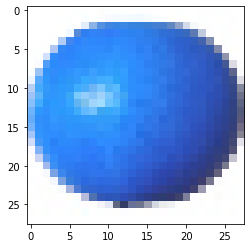

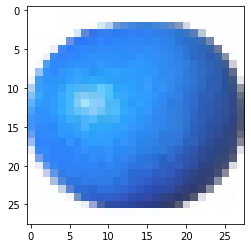

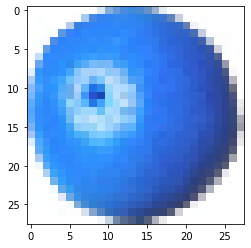

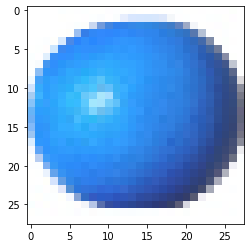

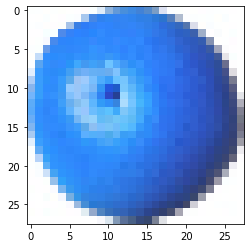

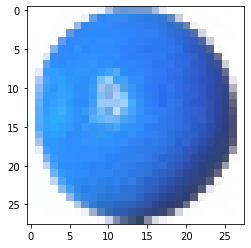

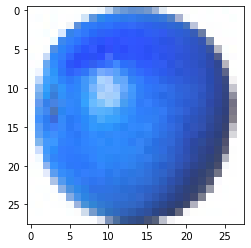

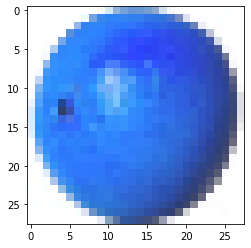

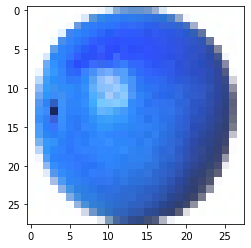

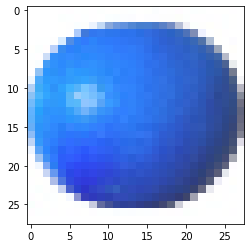

Test examples


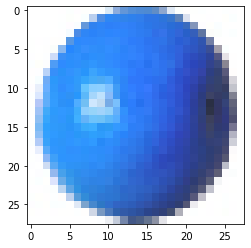

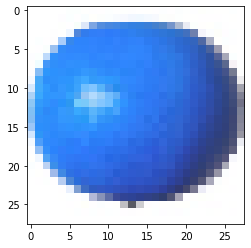

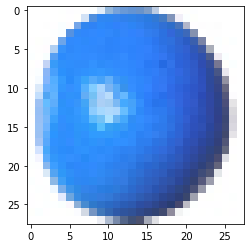

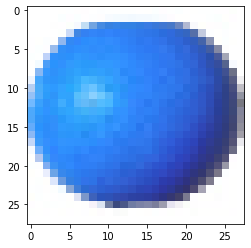

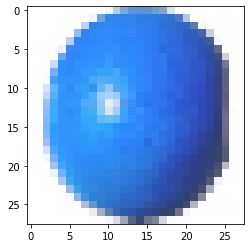

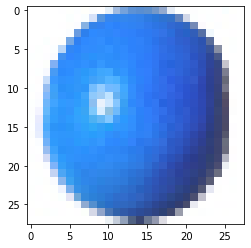

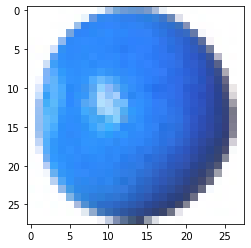

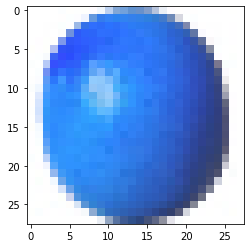

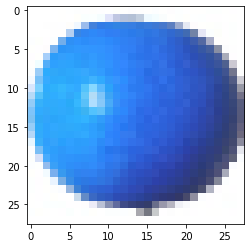

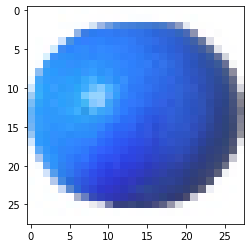

In [34]:
x_train, x_test = get_dataset(False, (28, 28))

print("x_train shape: " + str(x_train.shape))
print("x_test shape: " + str(x_test.shape))

print("Training examples")

for i in range(0, 10):
    
    plt.imshow(x_train[i])
    plt.show()
    
print("Test examples")    
    
for i in range(0, 10):
    
    plt.imshow(x_test[i])
    plt.show()

In [35]:
x_train = x_train.reshape(x_train.shape[0], 2352)
x_test = x_test.reshape(x_test.shape[0], 2352)
print("x_train shape: " + str(x_train.shape))
print("x_test shape: " + str(x_test.shape))

x_train shape: (67692, 2352)
x_test shape: (22688, 2352)


#### TRAIN

In [36]:
pca = Pca(x_train)

eigen vectors
[6.02440186e+02 2.33114560e+02 1.62945594e+02 ... 8.16207932e-04
 8.16415319e-04 8.15841132e-04]
eigen values
[[ 2.93203875e-03 -1.13222107e-02  2.37432910e-03 ... -5.62601902e-04
  -3.71477842e-04 -1.24345128e-04]
 [ 1.33462420e-03 -3.98432481e-03  1.23430476e-03 ...  3.21953507e-04
   2.38482252e-04 -7.06031832e-04]
 [ 2.94999171e-03 -7.83198278e-03  2.12245998e-03 ...  6.16213606e-05
   1.52074135e-05  6.70855090e-05]
 ...
 [ 2.03251397e-04 -1.67471820e-04  3.58262795e-05 ...  3.82720619e-03
  -2.67586997e-03  1.25096677e-02]
 [ 2.03664278e-04 -1.76229717e-04  3.54276308e-05 ... -3.49861905e-03
   3.99961577e-03  6.22791776e-03]
 [ 2.05123268e-04 -1.76031487e-04  3.56570774e-05 ... -1.90211067e-04
  -1.45468320e-03 -1.86055709e-02]]
explained variances
[[-5.85422161e-03  2.26063624e-02 -4.74067702e-03 ...  1.12331265e-03
   7.41706980e-04  2.48272276e-04]
 [-2.66476213e-03  7.95525652e-03 -2.46446047e-03 ... -6.42824784e-04
  -4.76162858e-04  1.40969037e-03]
 [-5.89006

##### 3 dimensions

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


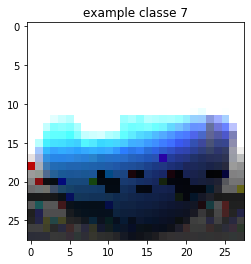

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


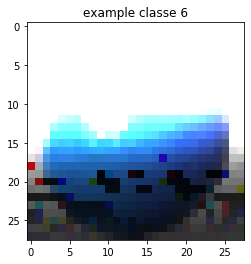

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


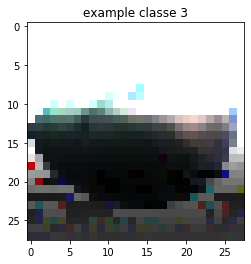

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


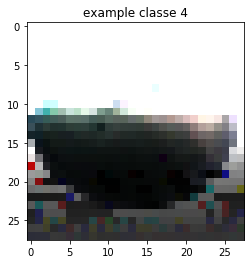

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


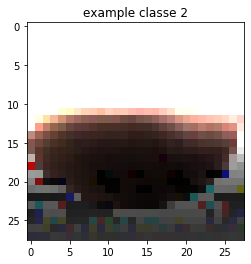

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


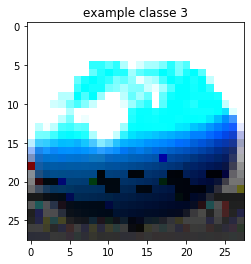

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


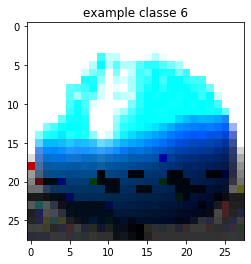

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


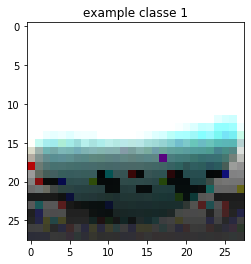

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


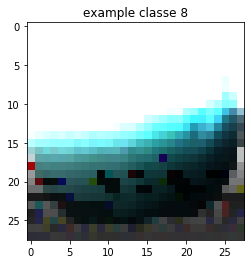

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


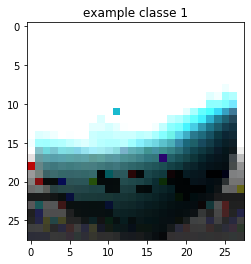

In [39]:
examples = x_test * pca.vectors.T

i = 0

while i < 1000:
    
    plt.title("example classe " + str(y_test[i]))
    plt.imshow(examples[i].reshape((28, 28, 3)).astype("float64"))
    plt.show()
    i += 100